In [1]:
#import stuff that needed
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#knobs
BATCH_SIZE = 16
EPOCHS = 30
IMG_SIZE = (224, 224)
IMG_SHAPE = (224, 224, 3)

In [4]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Dataset/3-mini.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/3-mini'

NUM_OF_CLASS = len(os.listdir(base_dir))

In [6]:
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'validation'
)

Found 301 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [8]:
TRAIN_SIZE = train_generator.n
TEST_SIZE = test_generator.n

In [9]:
model = Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_OF_CLASS, activation='softmax')
])

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_generator,
    epochs = EPOCHS,
    steps_per_epoch = TRAIN_SIZE // BATCH_SIZE,
    validation_data = test_generator,
    validation_steps = TEST_SIZE // BATCH_SIZE
)

Epoch 1/30
18/18 [==============================] - 21s 298ms/step - loss: 1.2159 - accuracy: 0.3881 - val_loss: 0.9585 - val_accuracy: 0.5625
Epoch 2/30
18/18 [==============================] - 5s 271ms/step - loss: 0.8208 - accuracy: 0.5559 - val_loss: 0.5384 - val_accuracy: 0.6719
Epoch 3/30
18/18 [==============================] - 5s 271ms/step - loss: 0.5917 - accuracy: 0.7681 - val_loss: 0.4209 - val_accuracy: 0.8438
Epoch 4/30
18/18 [==============================] - 5s 286ms/step - loss: 0.4965 - accuracy: 0.7931 - val_loss: 0.4433 - val_accuracy: 0.8125
Epoch 5/30
18/18 [==============================] - 5s 269ms/step - loss: 0.4579 - accuracy: 0.8284 - val_loss: 0.5006 - val_accuracy: 0.8125
Epoch 6/30
18/18 [==============================] - 5s 269ms/step - loss: 0.6977 - accuracy: 0.7258 - val_loss: 0.5709 - val_accuracy: 0.7656
Epoch 7/30
18/18 [==============================] - 5s 268ms/step - loss: 0.3209 - accuracy: 0.8985 - val_loss: 0.2393 - val_accuracy: 0.9531
Epoch

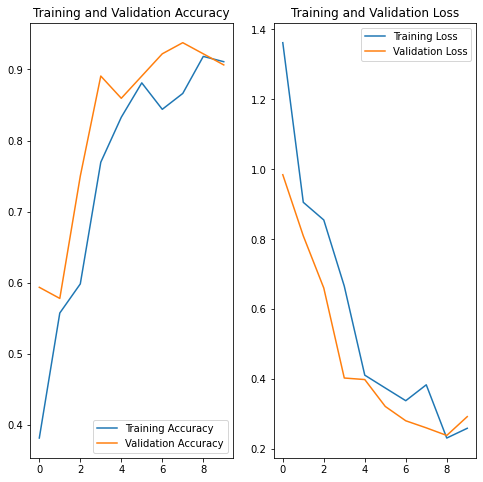

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving car6.jpg to car6.jpg
car6.jpg
Wortel


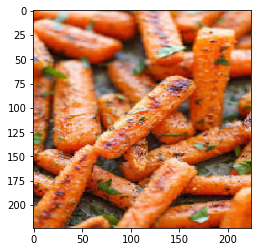

In [25]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMG_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Wortel')
  elif classes[0][1]==1:
    print('Apel')
  else :
    print('Jeruk')

In [26]:
export_dir = 'saved_model-fromscratch'

model.save(export_dir)

INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


In [27]:
!zip -r /content/saved_model-fromscratch.zip /content/saved_model-fromscratch

updating: content/saved_model-fromscratch/ (stored 0%)
updating: content/saved_model-fromscratch/assets/ (stored 0%)
updating: content/saved_model-fromscratch/keras_metadata.pb (deflated 86%)
updating: content/saved_model-fromscratch/saved_model.pb (deflated 90%)
updating: content/saved_model-fromscratch/variables/ (stored 0%)
updating: content/saved_model-fromscratch/variables/variables.data-00000-of-00001 (deflated 14%)
updating: content/saved_model-fromscratch/variables/variables.index (deflated 67%)


In [28]:
from google.colab import files
files.download("/content/saved_model-fromscratch.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>